<div style="border-style:groove;border-width:thin;padding:10px">
<h1> Ejemplo Clasificación con SVM </h1>
<p>En este ejemplo vamos a tratar de clasificar 3 tipos de flores en función de sus características físicas. Lo primero que vamos a hacer es importar los datos, que están en un dataset de prueba incluído con Scikit-Learn. Veamos la descripción de los datos:
</div>


In [6]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

iris = datasets.load_iris()
print(type(iris))
print(iris)
print(iris.DESCR)

<class 'sklearn.utils._bunch.Bunch'>
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1

<div style="border-style:groove;border-width:thin;padding:10px">
Vemos que en el tipo de dato <b>Bunch de Sklearn</b> tenemos mucha información. Podeís ver los nombres de las columnas, la matriz de correlación, etc. Sin embargo, esta información está metida específicamente para este dataset no tiene porqué estar en todos. Si queremos utilizar un dataframe de pandas podemos convertirlo:
</div>

In [7]:
flores = pd.DataFrame()
flores['tipo_flor'] = iris['target']
flores['sepal_length'] = iris['data'][:,0]
flores['sepal_width'] = iris['data'][:,1]
flores['petal_length'] = iris['data'][:,2]
flores['petal_width'] = iris['data'][:,3]
print(flores.head())

flores.corr()[['tipo_flor','petal_length','petal_width']]

   tipo_flor  sepal_length  sepal_width  petal_length  petal_width
0          0           5.1          3.5           1.4          0.2
1          0           4.9          3.0           1.4          0.2
2          0           4.7          3.2           1.3          0.2
3          0           4.6          3.1           1.5          0.2
4          0           5.0          3.6           1.4          0.2


,tipo_flor,petal_length,petal_width
tipo_flor,1.000000,0.949035,0.956547
sepal_length,0.782561,0.871754,0.817941
sepal_width,-0.426658,-0.428440,-0.366126
petal_length,0.949035,1.000000,0.962865
petal_width,0.956547,0.962865,1.000000


<div style="border-style:groove;border-width:thin;padding:10px">
Al pintar la matriz de correlación vemos que el tipo de flor viene determinado por el largo y el ancho del pétalo. Ya lo habíamos visto en teoría. Vamos entonces a utilizar estos dos datos para entrenar nuestro decisor.
    <p>El algoritmo SVM es <b>muy sensible a la escala de los datos</b>, por lo tanto, <b>siempre vamos a escalar los datos antes de entrenar</b>.</p>
    <p>Vamos a pintar los tipos de flores en función de las dos métricas que vamos a utilizar</p>
</div>

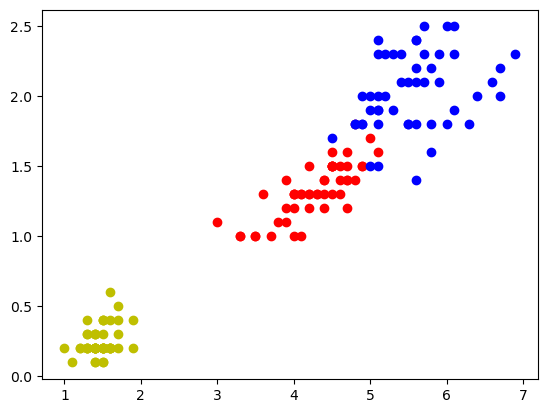

In [8]:
plt.scatter(flores.loc[flores['tipo_flor']==0]['petal_length'],flores.loc[flores['tipo_flor']==0]['petal_width'],color='y')
plt.scatter(flores.loc[flores['tipo_flor']==1]['petal_length'],flores.loc[flores['tipo_flor']==1]['petal_width'],color='r')
plt.scatter(flores.loc[flores['tipo_flor']==2]['petal_length'],flores.loc[flores['tipo_flor']==2]['petal_width'],color='b')

plt.show()

<div style="border-style:groove;border-width:thin;padding:10px">
Como podéis observar, va a ser muy fácil detectar las flores del tipo 0 y no tanto las otras dos. Vamos a escalar los datos y a usar un detector lineal.
</div>

In [9]:
scaler = StandardScaler()
linear_svc = LinearSVC(C=50,loss='hinge')

<div style="border-style:groove;border-width:thin;padding:10px">
LinearSVC (Linear Support Vector Classification) es un clasificador lineal que aplica la técnica de Support Vector Machines. C es el parámetro que nos permite variar el balance entre un margen amplio y los fallos que se tiene a la hora de clasificar el dataset. loss es la función de pérdida que se va a usar. 
</div>

In [10]:
from sklearn.model_selection import train_test_split
X = flores[['petal_length','petal_width']]
y = flores['tipo_flor'].to_frame()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


<div style="border-style:groove;border-width:thin;padding:10px">
Cuando usemos LinearSVC tenemos que tener en cuenta que el método fit espera que y sea algo parecido a una lista, es decir, un array de una sola dimensión. 
</div>

In [12]:
linear_svc.fit(X_train,y_train)

c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=50, loss='hinge')

<div style="border-style:groove;border-width:thin;padding:10px">
Ya tenemos el sistema entrenado. Como en el caso de la regresión lineal tenemos un objeto (linear_svc) que contiene los atributos con la información de la solución. Si queremos podemos acceder a los coeficientes.
    Vamos a usar el conjunto de test para evaluar si el resultado es bueno o malo. Usamos X_test para predecir el tipo de flor en función de los datos de entrada.
</div>

In [13]:
y_pred = linear_svc.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


<div style="border-style:groove;border-width:thin;padding:10px">
Ahora vamos a ver si ha ido bien o mal comparando con el conjunto de test. Para ello Scikit-Learn nos ofrece una herramienta muy buena, el informe de clasificación. En este informe nos da calculados las principales métricas de calidad de una clasificación.</div>

In [15]:
cr = classification_report(y_test, y_pred)
print(cr) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158

<div style="border-style:groove;border-width:thin;padding:10px">
    <b>Precision</b> es el cociente entre los positivos correctos y el total de positivos. El <b>recall</b> es el cociente entre los positivos correctos y el total de casos que debería haber encontrado (positivos correctos + falsos negativos). 
<p>En nuestro caso, el 93% de las flores del tipo 0 que han sido etiquetadas como tipo 0 eran realmente del tipo 0. El 100% del total de flores del tipo 0 han sido etiquetadas como tipo 0. </p>
    <p> El <b>f1-score</b> es un compendio de ambas medidas. </p>
    <p>¿El resultado que hemos obtenido es bueno?</p>
 
</div>